In [ ]:
import requests
import csv
import matplotlib.pyplot as plt

# Define your Alpha Vantage API key
api_key = 'T30A4JJO98UDG3RU'

# Define the ticker symbol for Tesla
ticker = "TSLA"

# Make the API request to retrieve the quarterly earnings data
earnings_url = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={ticker}&apikey={api_key}"
earnings_response = requests.get(earnings_url)
earnings_data = earnings_response.json()

# Extract the quarterly earnings data from the API response
quarterly_earnings = earnings_data['quarterlyEarnings']

# Fetch income statement data separately using the "INCOME_STATEMENT" function
income_statement_url = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={ticker}&apikey={api_key}"
income_statement_response = requests.get(income_statement_url)
income_statement_data = income_statement_response.json()

# Fetch balance sheet data separately using the "BALANCE_SHEET" function
balance_sheet_url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey={api_key}"
balance_sheet_response = requests.get(balance_sheet_url)
balance_sheet_data = balance_sheet_response.json()

# Extract the income statement data
quarterly_income_statement = income_statement_data['quarterlyReports']

# Extract the balance sheet data
quarterly_balance_sheet = balance_sheet_data['quarterlyReports']

# Create maps from fiscal date endings to financial metrics
eps_map = {earnings.get('fiscalDateEnding'): float(earnings.get('reportedEPS', '0')) for earnings in quarterly_earnings}
financial_metrics_map = {}
for report in quarterly_income_statement:
    fiscal_date_ending = report.get('fiscalDateEnding')
    financial_metrics_map[fiscal_date_ending] = {
        'totalRevenue': float(report.get('totalRevenue', '0')),
        'netIncome': float(report.get('netIncome', '0')),
        'operatingIncome': float(report.get('operatingIncome', '0')),
        'grossProfit': float(report.get('grossProfit', '0')),
        'operatingExpenses': float(report.get('operatingExpenses', '0')),
        'researchAndDevelopment': float(report.get('researchAndDevelopment', '0')),
        # Add more metrics as needed
    }

# Add total assets and return on equity (ROE) to the financial metrics map
for report in quarterly_balance_sheet:
    fiscal_date_ending = report.get('fiscalDateEnding')
    financial_metrics_map[fiscal_date_ending]['totalAssets'] = float(report.get('totalAssets', '0'))

for fiscal_date_ending, metrics in financial_metrics_map.items():
    net_income = metrics['netIncome']
    total_equity = metrics['totalAssets']
    roe = (net_income / total_equity) * 100
    metrics['ROE'] = roe

# Combine the EPS and financial metrics data based on fiscal date
financial_data = []
for fiscal_date_ending, metrics in financial_metrics_map.items():
    eps = eps_map.get(fiscal_date_ending)
    if eps is not None:  # Only include dates where we have EPS data
        financial_data.append([fiscal_date_ending, eps] + list(metrics.values()))

# Save the combined financial data to a CSV file
filename = "tesla_financial_data.csv"
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Quarter', 'EPS', 'Total Revenue', 'Net Income', 'Operating Income', 'Gross Profit',
                     'Operating Expenses', 'R&D Expenses', 'Total Assets', 'ROE'])
    writer.writerows(financial_data)

print("Data saved successfully to", filename)

# Read the financial data from the CSV file
financial_data = []
with open(filename, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header row
    for row in reader:
        financial_data.append(row)

# Extract the financial metric names and data
metric_names = header[1:]  # Exclude the "Quarter" column
quarters = [data[0] for data in financial_data]
metrics = [list(map(float, data[1:])) for data in financial_data]

# Set up the subplots
num_metrics = len(metric_names)
fig, axs = plt.subplots(num_metrics, 1, figsize=(10, 3*num_metrics), sharex=True)

# Plot each financial metric
for i, metric_name in enumerate(metric_names):
    ax = axs[i]
    metric_data = [data[i] for data in metrics]
    ax.plot(quarters, metric_data, marker='o')
    ax.set_title(metric_name)
    ax.grid(True)

# Set the x-axis label and rotate tick labels
plt.xlabel('Quarter')
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


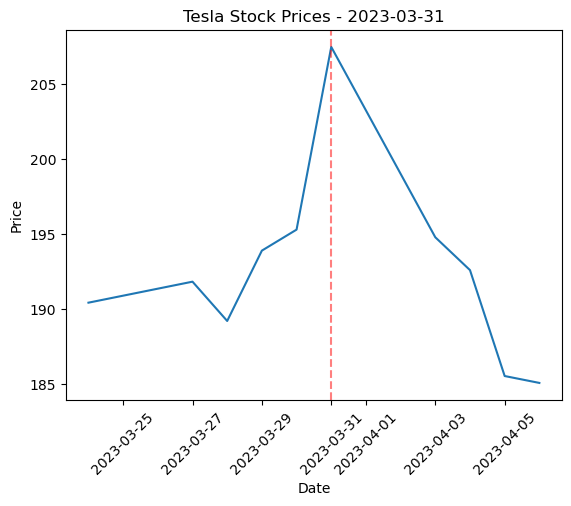

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


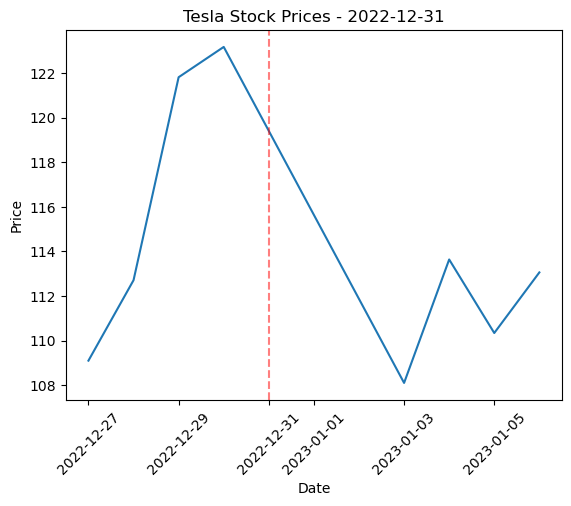

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


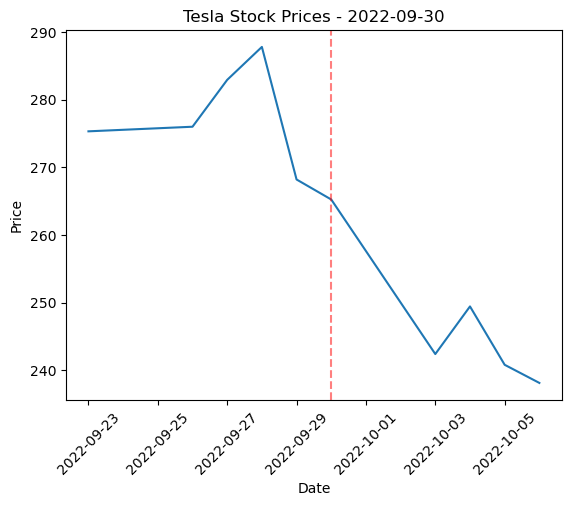

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


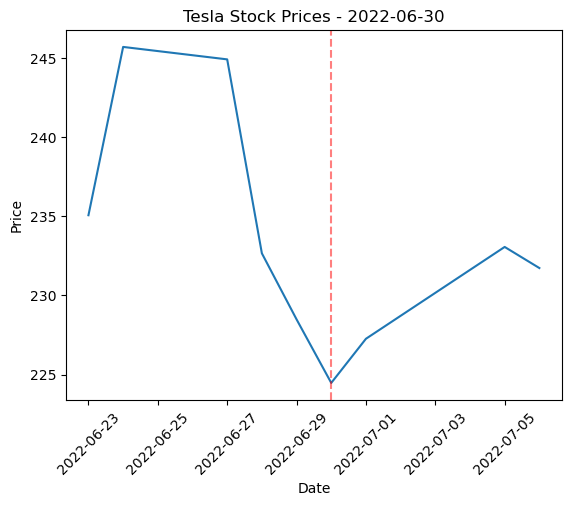

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


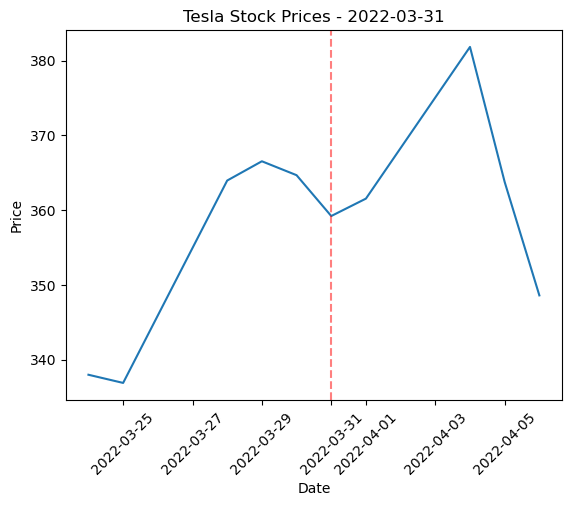

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


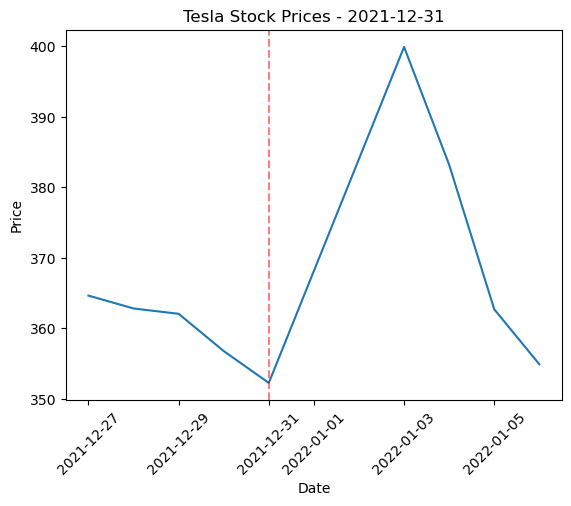

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


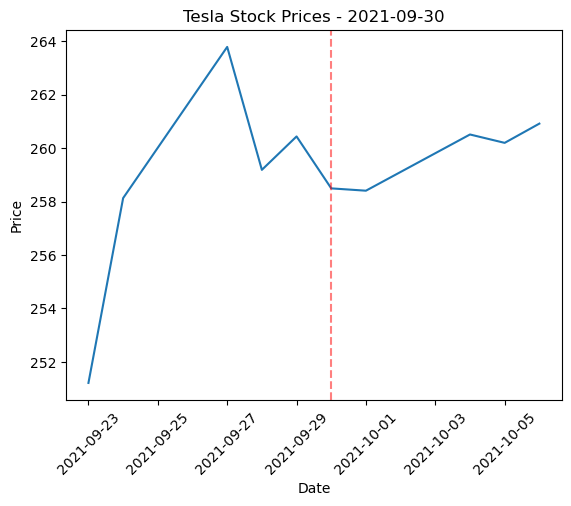

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


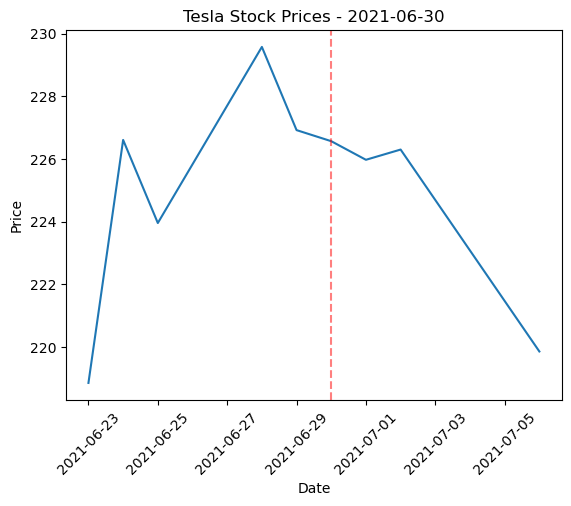

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


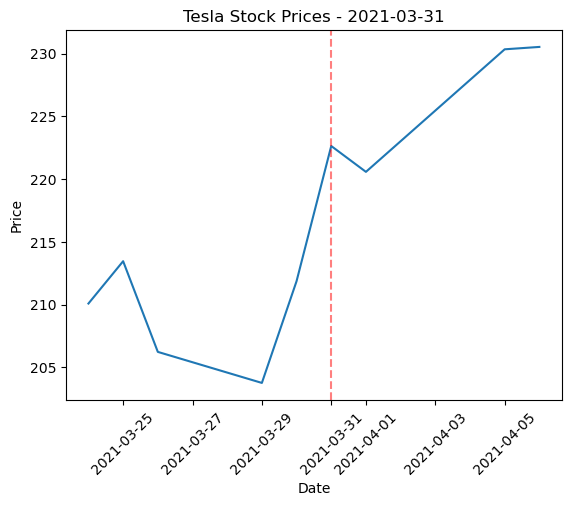

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


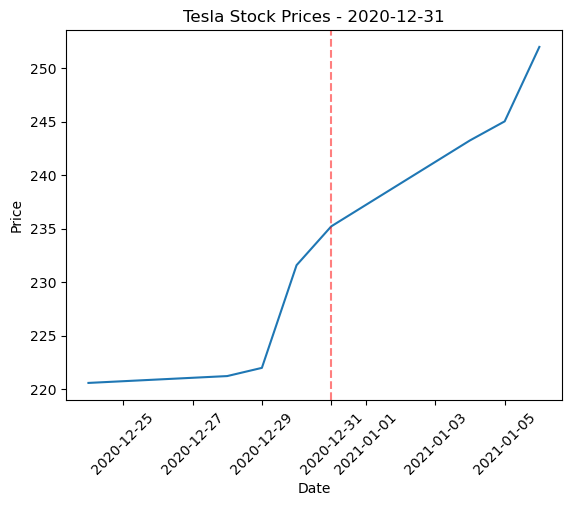

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


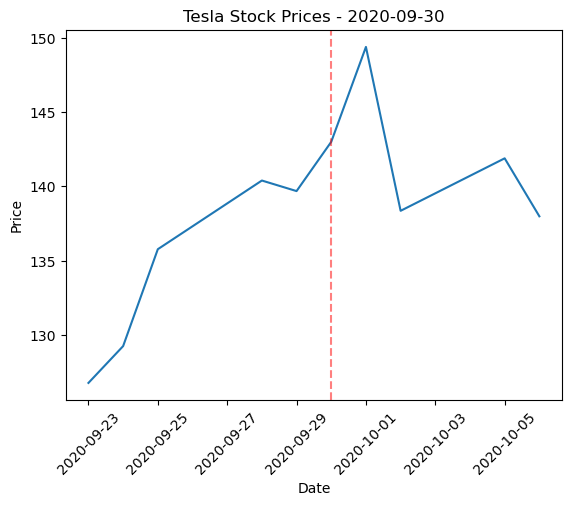

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


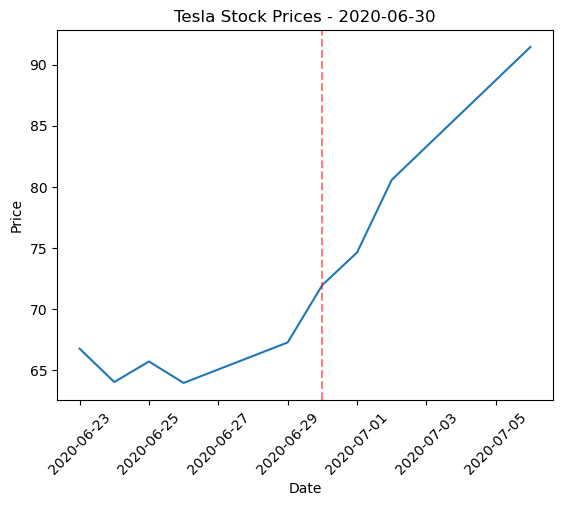

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


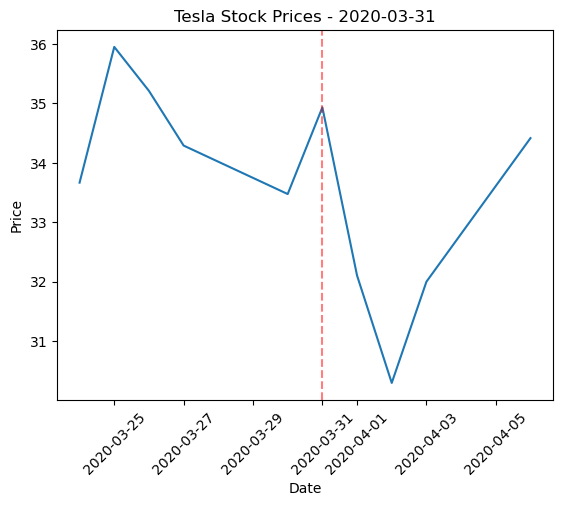

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


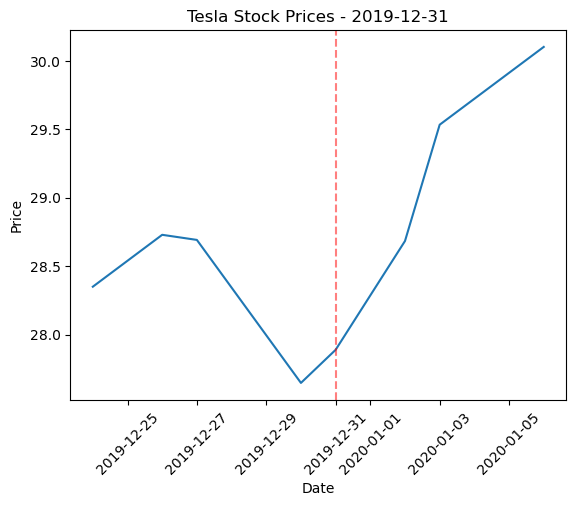

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


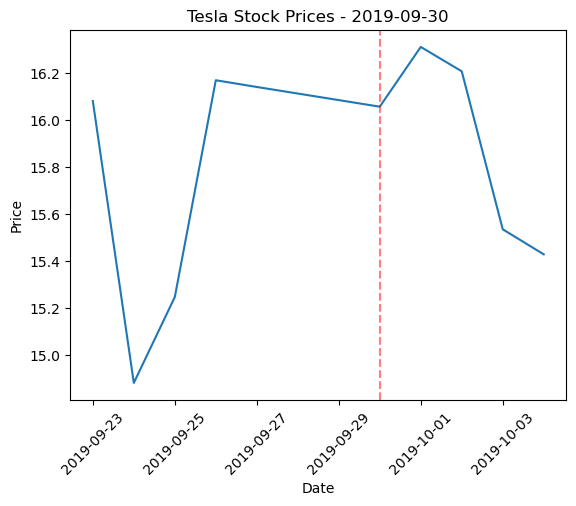

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


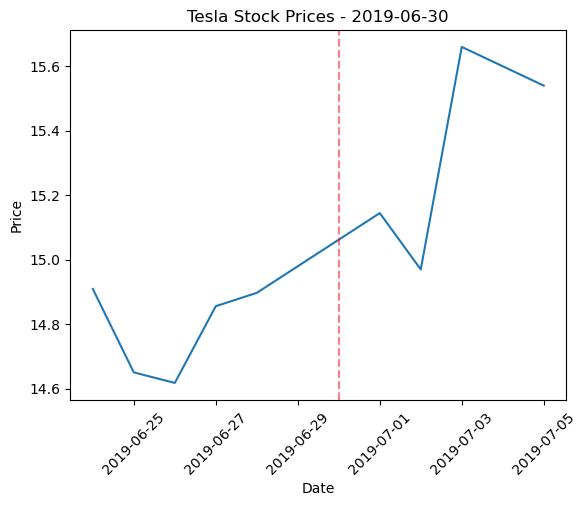

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


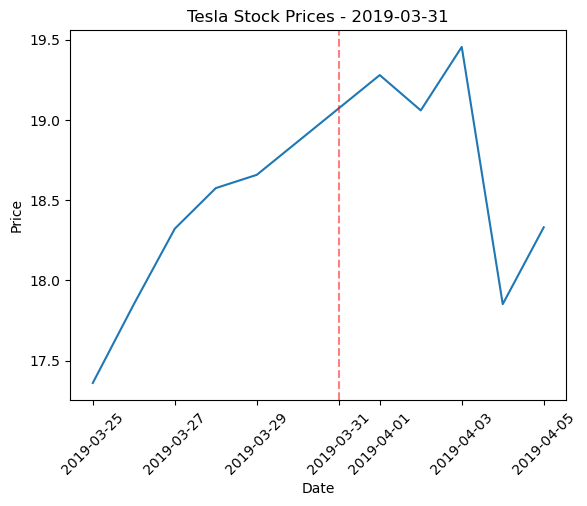

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


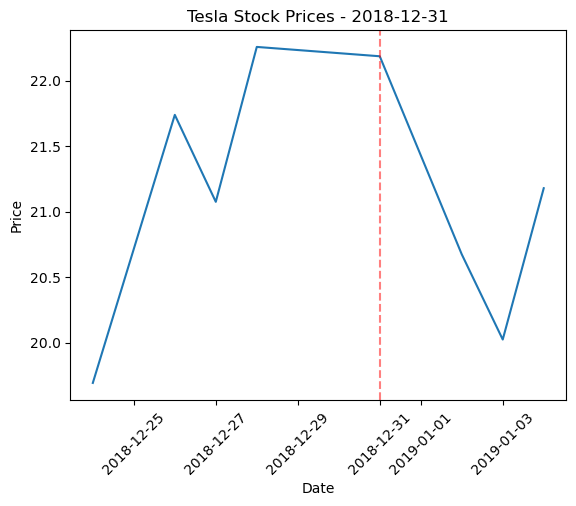

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


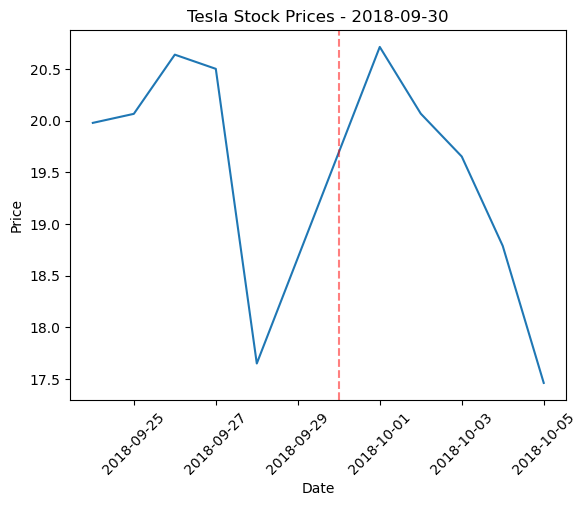

[*********************100%***********************]  1 of 1 completed


/var/folders/fn/kl8cvg_x4659hhy0mdqymlmw0000gp/T/ipykernel_41063/1421760084.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))


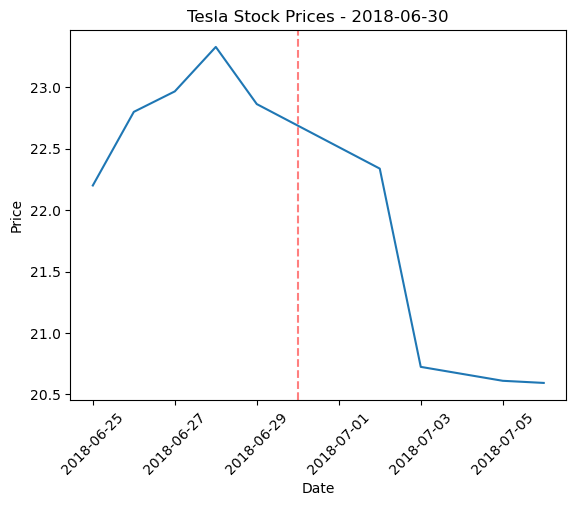

In [36]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbol for Tesla
ticker = "TSLA"

# Define the list of dates to mark on the plot
marked_dates = [
    "2023-03-31",
    "2022-12-31",
    "2022-09-30",
    "2022-06-30",
    "2022-03-31",
    "2021-12-31",
    "2021-09-30",
    "2021-06-30",
    "2021-03-31",
    "2020-12-31",
    "2020-09-30",
    "2020-06-30",
    "2020-03-31",
    "2019-12-31",
    "2019-09-30",
    "2019-06-30",
    "2019-03-31",
    "2018-12-31",
    "2018-09-30",
    "2018-06-30"
]

# Create an empty DataFrame to store the prices
df = pd.DataFrame()

# Loop over the marked dates and retrieve the stock prices
for date in marked_dates:
    # Retrieve the historical data using Yahoo Finance
    start_date = pd.to_datetime(date) - pd.DateOffset(days=7)
    end_date = pd.to_datetime(date) + pd.DateOffset(days=7)
    data = yf.download(ticker, start=start_date, end=end_date)

    # Extract the closing prices for the specified date range
    selected_dates = pd.date_range(start=start_date, end=end_date)
    selected_data = data[data.index.isin(selected_dates)]["Close"]

    # Append the selected prices to the DataFrame
    df = df.append(pd.DataFrame({"Date": selected_data.index, "Price": selected_data.values}))

    # Create a line plot for the current time period
    plt.plot(selected_data.index, selected_data.values)
    
    # Mark the selected dates with vertical lines
    for selected_date in selected_dates:
        if selected_date.date().isoformat() in marked_dates:
            plt.axvline(x=selected_date, color='r', linestyle='--', alpha=0.5)
    
    plt.title(f"Tesla Stock Prices - {date}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

# Save the DataFrame to a CSV file
df.to_csv("tesla_prices.csv", index=False)


In [3]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from tabulate import tabulate
from urllib.parse import urlparse
from colorama import Fore, Style
from nltk.sentiment import SentimentIntensityAnalyzer


def is_valid_url(url):
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)


def get_article_summaries(company_name, api_key, num_summaries):
    # Step 1: Fetch news articles related to the company using News API
    base_url = "https://newsapi.org/v2/everything"
    params = {
        "q": company_name,
        "apiKey": api_key,
        "language": "en",
        "sortBy": "relevance",
        "pageSize": 100  # Fetch 100 articles
    }
    response = requests.get(base_url, params=params)
    data = response.json()

    # Step 2: Extract summaries, sources, and dates from the articles
    summaries = []
    sources = {}
    dates = {}
    sid = SentimentIntensityAnalyzer()
    for article in data.get("articles", []):
        article_summary = article.get("description")
        article_source = article.get("source", {}).get("name")
        article_date = article.get("publishedAt")
        if article_summary and article_source and article_date:
            if len(summaries) >= num_summaries:
                break
            if article_source not in sources or sources[article_source] < 5:
                sentiment_score = sid.polarity_scores(article_summary)
                sentiment_label = "Good" if sentiment_score["compound"] >= 0 else "Bad"
                summaries.append((article_summary, article_source, article_date, sentiment_label))
                if article_source in sources:
                    sources[article_source] += 1
                else:
                    sources[article_source] = 1
                dates[article_source] = article_date

    return summaries, sources


# Example usage
company_name = "Goldman Sachs earnings"
api_key = "d039c082533641749f8ffdf7d1cbb940"  # Replace with your News API key
num_summaries = 50
summaries, sources = get_article_summaries(company_name, api_key, num_summaries)

# Display the summaries, sources, dates, and sentiment labels in a formatted table with color
table_data = []
for i, (summary, source, date, sentiment_label) in enumerate(summaries):
    table_data.append([f"{Fore.BLUE}Summary {i+1}{Style.RESET_ALL}", summary, source, date, sentiment_label])

print(tabulate(table_data, headers=[f"{Fore.YELLOW}Summary{Style.RESET_ALL}", f"{Fore.YELLOW}Content{Style.RESET_ALL}", f"{Fore.YELLOW}Source{Style.RESET_ALL}", f"{Fore.YELLOW}Date{Style.RESET_ALL}", f"{Fore.YELLOW}Sentiment{Style.RESET_ALL}"], tablefmt="fancy_grid"))

# Calculate the percentage of good and bad news
total_news = len(summaries)
good_news = sum(1 for _, _, _, sentiment in summaries if sentiment == "Good")
bad_news = total_news - good_news
good_percentage = (good_news / total_news) * 100
bad_percentage = (bad_news / total_news) * 100

print(f"Total News: {total_news}")
print(f"Good News: {good_news} ({good_percentage:.2f}%)")
print(f"Bad News: {bad_news} ({bad_percentage:.2f}%)")


╒════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════╤══════════════════════╤═════════════╕
│ Summary    │ Content                                                                                                                                                                                                                                                              │ Source                 │ Date                 │ Sentiment   │
╞════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪════════════════════════╪══════════════════

In [ ]:
import praw

def get_reddit_opinions(company_name, client_id, client_secret, user_agent, num_posts):
    # Authenticate with the Reddit API
    reddit = praw.Reddit(client_id=client_id,
                         client_secret=client_secret,
                         user_agent=user_agent)

    # Search for relevant posts containing the company name
    posts = reddit.subreddit("all").search(company_name, limit=num_posts, sort="top", time_filter="day")

    opinions = []
    for post in posts:
        opinions.append(post.title)
        opinions.append(post.selftext)
        post.comments.replace_more(limit=None)
        for comment in post.comments.list():
            opinions.append(comment.body)

    return opinions


# Example usage
company_name = "Tesla Stock"
client_id = "DGKjJpMCfCqRsUjEWFsFrQ" # Replace with your Reddit client ID
client_secret = "Adk3erj_LyGngw2eXFDQxaIjx_25Iw" # Replace with your Reddit client secret
user_agent = "SamiNoroozi"  # Replace with your Reddit user agent
num_posts = 20
opinions = get_reddit_opinions(company_name, client_id, client_secret, user_agent, num_posts)

# Display the opinions
for i, opinion in enumerate(opinions, start=1):
    print(f"Opinion {i}: {opinion}")


[*********************100%***********************]  1 of 1 completed


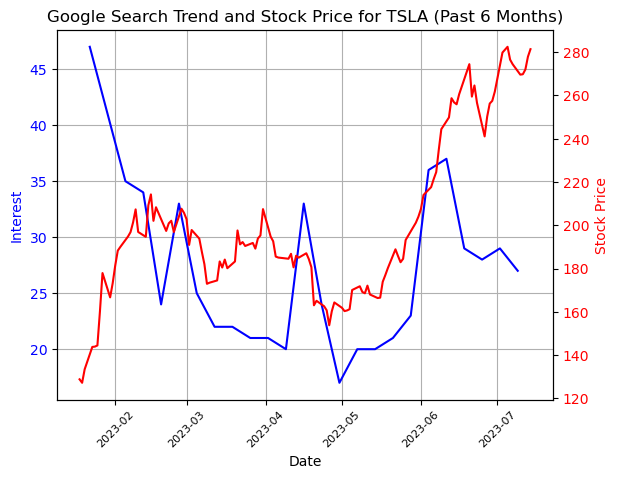

In [6]:
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta, date

def plot_company_trend_and_stock_price(company):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(kw_list=[company])

    # Get the interest over time data
    interest_over_time_df = pytrends.interest_over_time()

    # Calculate the start and end dates for the past 6 months
    end_date = date.today().strftime("%Y-%m-%d")
    start_date = (date.today() - timedelta(days=6 * 30)).strftime("%Y-%m-%d")

    # Filter interest data for the past 6 months
    interest_over_time_df = interest_over_time_df[start_date:end_date]

    # Get the stock price data for the past 6 months
    stock_data = yf.download(company, start=start_date, end=end_date)

    # Plotting the trend and stock price
    fig, ax1 = plt.subplots()

    # Plotting the trend on the left y-axis
    ax1.plot(interest_over_time_df.index, interest_over_time_df[company], color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Interest", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Creating a second y-axis for stock price
    ax2 = ax1.twinx()

    # Plotting the stock price on the right y-axis
    ax2.plot(stock_data.index, stock_data['Close'], color='red')
    ax2.set_ylabel("Stock Price", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Setting the chart title
    plt.title(f"Google Search Trend and Stock Price for {company} (Past 6 Months)")

    # Adjusting x-axis tick labels for better readability
    ax1.xaxis.set_tick_params(rotation=45, labelsize=8)
    ax2.xaxis.set_tick_params(rotation=45, labelsize=8)

    # Displaying the chart
    plt.show()

# Example usage
company_name = "TSLA"  # Replace with the stock symbol of the desired company
plot_company_trend_and_stock_price(company_name)


[*********************100%***********************]  1 of 1 completed


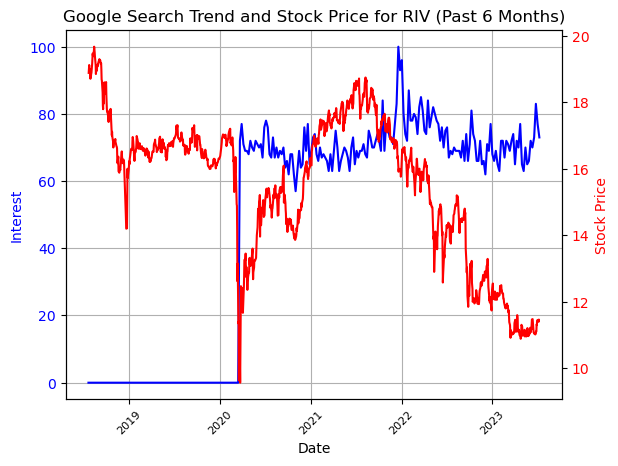

In [28]:
import pytrends
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

def download_trending_data(company, filename):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(kw_list=[company])

    # Get the interest over time data
    interest_over_time_df = pytrends.interest_over_time()

    # Save the data to a CSV file
    interest_over_time_df.to_csv(filename)

def plot_company_trend_and_stock_price(company):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(kw_list=[company])

    # Get the interest over time data
    interest_over_time_df = pytrends.interest_over_time()

    # Calculate the start and end dates for the past 6 months
    end_date = interest_over_time_df.index[-1].strftime("%Y-%m-%d")
    start_date = interest_over_time_df.index[0].strftime("%Y-%m-%d")

    # Get the stock price data for the past 6 months
    stock_data = yf.download(company, start=start_date, end=end_date)

    # Plotting the trend and stock price
    fig, ax1 = plt.subplots()

    # Plotting the trend on the left y-axis
    ax1.plot(interest_over_time_df.index, interest_over_time_df[company], color='blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Interest", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Creating a second y-axis for stock price
    ax2 = ax1.twinx()

    # Plotting the stock price on the right y-axis
    ax2.plot(stock_data.index, stock_data['Close'], color='red')
    ax2.set_ylabel("Stock Price", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Setting the chart title
    plt.title(f"Google Search Trend and Stock Price for {company} (Past 6 Months)")

    # Adjusting x-axis tick labels for better readability
    ax1.xaxis.set_tick_params(rotation=45, labelsize=8)
    ax2.xaxis.set_tick_params(rotation=45, labelsize=8)

    # Displaying the chart
    plt.show()

# Example usage
company_name = "RIV"  # Replace with the stock symbol or the desired company name
csv_filename = "trending_data.csv"  # Replace with the desired filename for the CSV file

# Download the trending data to a CSV file
download_trending_data(company_name, csv_filename)

# Plot the trend and stock price data
plot_company_trend_and_stock_price(company_name)


UsageError: Line magic function `%npm` not found.
